# Twitter Sentiment Analysis
I start out by using a labeled dataset to train a neural network to do sentiment analysis based on Twitter posts (just the text).

## Data Loading
First, I load the file into a dataframe.

In [1]:
import pandas as pd

file_path = "../datasets/Sentiment140/training.1600000.processed.noemoticon.csv"
tweets = pd.read_csv(file_path, delimiter=",", encoding="latin-1", header=None, names=["polarity", "ID", "date", "query", "username", "text"], usecols=["polarity", "text"])

## Data Exploration

Lets have a look at the data.

In [2]:
tweets

,polarity,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


We have 1.6 million tweets with labels.
0 means negative and 4 means positive.

Text(0, 0.5, 'Number of tweets')

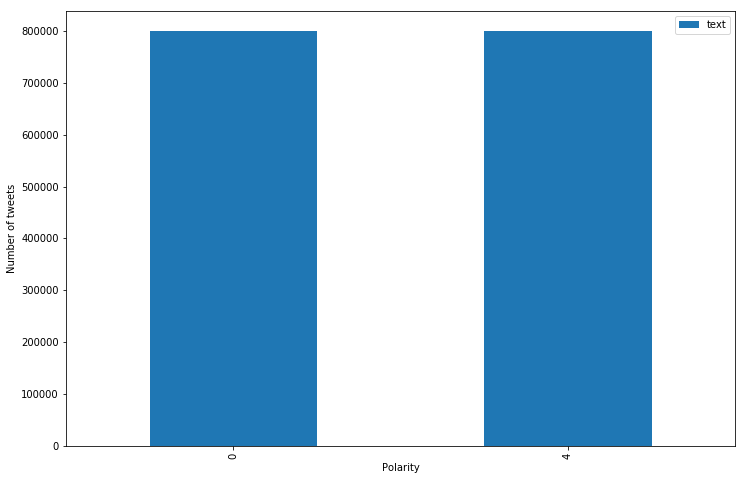

In [3]:
import matplotlib
%matplotlib inline

plot = tweets[['polarity', 'text']].groupby('polarity').count().plot(kind='bar', figsize=(12,8))
plot.set_xlabel("Polarity")
plot.set_ylabel("Number of tweets")

Interestingly, some tweets are longer than 140 characters (the limit for tweets). 

Text(0, 0.5, 'Number of tweets')

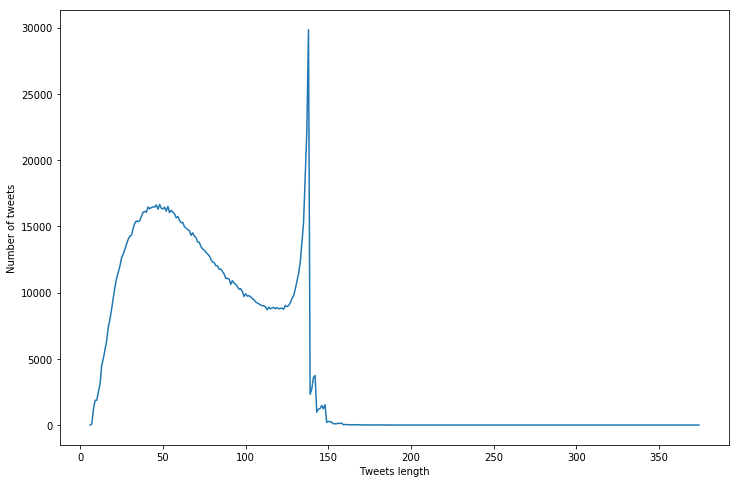

In [4]:
tweet_lengths = tweets['text'].str.len()
plot = tweet_lengths.groupby(tweet_lengths).count().plot(figsize=(12,8))
plot.set_xlabel("Tweets length")
plot.set_ylabel("Number of tweets")

Looking at the longest tweet, it seems to be an issue with decoding the text. 
This is something I will need to account for when preprocessing the data.

In [5]:
tweets.iloc[tweet_lengths.idxmax()]['text']

'@catfish_ohm à¹\x80à¸\x84à¹\x89à¸²à¹\x83à¸«à¹\x89à¸?à¸²à¸£à¹\x8cà¸\x95à¸¹à¸\x99à¸?à¸¸à¹\x82à¸£à¸°(à¸ªà¸±à¸ªà¹\x86+à¸¢à¸¹à¸£à¸´à¹?à¸?à¹\x84à¸\x94à¹\x89à¹?à¸\x97à¸\x99à¸\x99à¸°à¸\x9eà¸\xadà¸\x94à¸µà¸¡à¸´à¹\x82à¸?à¸°à¸«à¸§à¸\x87(à¸\x82à¸\x99à¸²à¸\x94à¹\x80à¸\x9fà¸´à¸\x99à¹?à¸?à¸¢à¸±à¸\x87à¹\x80à¸\x84à¸¢à¹\x83à¸«à¹\x89à¹\x84à¸¡à¹\x88à¹\x83à¸\x8aà¹\x88à¹\x80à¸«à¸£à¸\xad.à¹?à¸\x95à¹\x88à¸\x8aà¹\x88à¸²à¸\x87à¹\x80à¸«à¸\xadà¸°à¸£à¸²à¸¢à¸\x99à¸±à¹\x89à¸\x99à¹\x80à¸\x82à¸²à¹\x82à¸¡à¹\x80à¸\xadà¸°à¸?à¸§à¹\x88à¸²à¸\x9bà¸¥à¸²à¹?à¸¡à¸§à¹\x80à¸¢à¸\xadà¸° = '

## Text preprocessing

First up, I remove all tweets that are longer than 140 characters

In [6]:
tweets = tweets[tweet_lengths <= 140]
tweets.groupby('polarity').count()

,text
polarity,
0,792130
4,790696


Next, I change the label for the positive reviews to 1.

In [7]:
tweets.at[tweets['polarity'] == 4, 'polarity'] = 1
tweets.groupby('polarity').count()

C:\Users\Robin\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,text
polarity,
0,792130
1,790696


I tokenize the text and remove links, @... and stopwords

In [11]:
from tqdm import tqdm_notebook as tqdm
import re
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

# Loading stopwords for english
stopWords = set(stopwords.words('english'))

# Adding a few words that I noticed
stopWords.add('..')
stopWords.add('...')

url_regex = re.compile(r"http[^ ]+", re.IGNORECASE)
at_regex = re.compile(r"@[^ ]+", re.IGNORECASE)

tknzr = TweetTokenizer()

tweets = tweets.assign(words=pd.Series([[] for _ in range(len(tweets))]))

for i, row in tqdm(tweets.iterrows(), total=len(tweets)):
    text = row['text']
    text = re.sub(url_regex, '', text)
    text = re.sub(at_regex, '', text)
    
    tokenized_text = tknzr.tokenize(text)
    filtered_text = []
    not_ = False
    for word in tokenized_text:
        if word == "not" or (word not in stopWords and len(word) > 1):
            if word == "not":
                not_ = False if not_ else True
            elif "'t" in word:
                not_ = False if not_ else True
                if not_:
                    filtered_text.append(word.replace("'t", "") + "_not")
                else:
                    filtered_text.append(word.replace("'t", ""))
            else:
                if not_:
                    filtered_text.append(word + "_not")
                else:
                    filtered_text.append(word)
    tweets.at[i,'words'] = filtered_text

In [12]:
tweets

,polarity,text,words
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[Awww, that's, bummer, You, shoulda, got, Davi..."
1,0,is upset that he can't update his Facebook by ...,"[upset, can_not, update_not, Facebook_not, tex..."
2,0,@Kenichan I dived many times for the ball. Man...,"[dived, many, times, ball, Managed, save, 50, ..."
3,0,my whole body feels itchy and like its on fire,"[whole, body, feels, itchy, like, fire]"
4,0,"@nationwideclass no, it's not behaving at all....","[behaving_not, i'm_not, mad_not, can, see]"
5,0,@Kwesidei not the whole crew,"[whole_not, crew_not]"
6,0,Need a hug,"[Need, hug]"
7,0,@LOLTrish hey long time no see! Yes.. Rains a...,"[hey, long, time, see, Yes, Rains, bit, bit, L..."
8,0,@Tatiana_K nope they didn't have it,[nope]
9,0,@twittera que me muera ?,"[que, muera]"


Text(0, 0.5, 'Number of tweets')

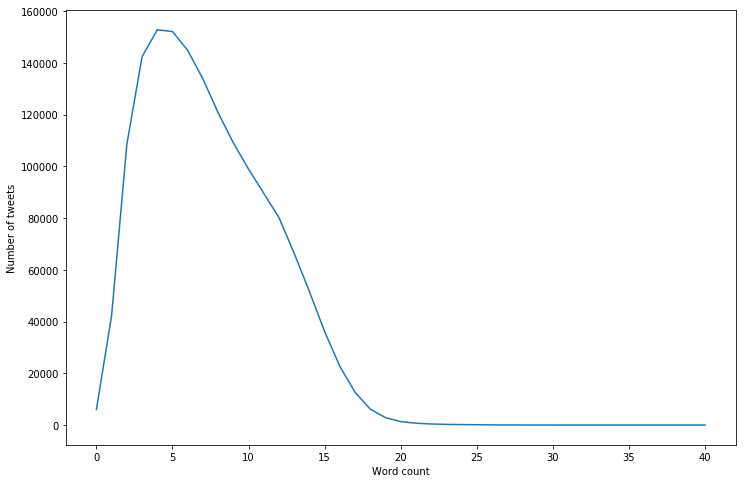

In [13]:
word_counts = tweets['words'].str.len()
plot = word_counts.groupby(word_counts).count().plot(figsize=(12,8))
plot.set_xlabel("Word count")
plot.set_ylabel("Number of tweets")

Now I build the vocabulary
For that, I first find out how frequent the words are in the corpus.
I replace all words that appeary in less then 50 tweets by the UNK-tag.

In [14]:
word_count = {}

for i, row in tqdm(tweets.iterrows(), total=len(tweets)):
    for word in row['words']:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
len(word_count)

472665

Lets look at the 10 most frequent words

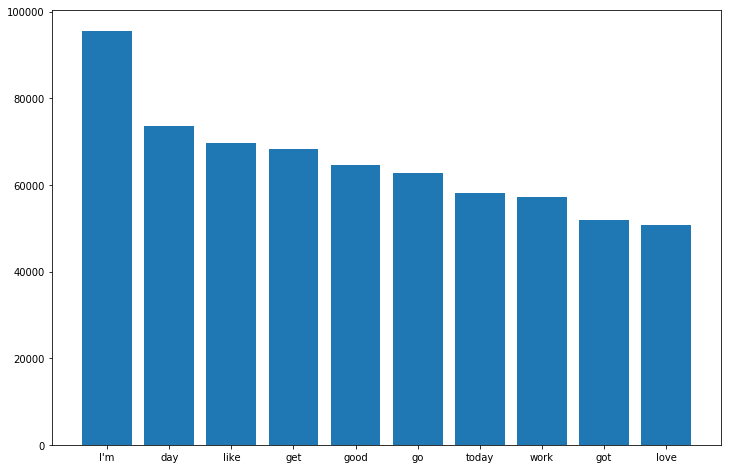

In [15]:
import operator
import matplotlib.pylab as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 8))

lists = sorted(word_count.items(), key=operator.itemgetter(1), reverse=True)

x, y = zip(*lists[:10])

plt.bar(x, y)
plt.show()

In [16]:
filtered_word_count = {k: v for k, v in word_count.items() if v > 50}
len(filtered_word_count)

16167

In [17]:
import json

word_to_ix = {}

word_to_ix['<PAD>'] = 0
word_to_ix['<UNK>'] = 1

counter = len(word_to_ix)

for word in filtered_word_count:
    word_to_ix[word] = counter
    counter += 1
    
with open('vocab.json', 'w') as outfile:  
    json.dump(word_to_ix, outfile)
len(word_to_ix)

16169

Now I prepare a pytorch dataset class to load in the dataframe.

In [18]:
import torch
from torch.utils.data.dataset import Dataset

class TrainingDataset(Dataset):
    def __init__(self, dataframe, vocab, max_len):
        self.data = dataframe.values
        self.max_len = max_len
        self.vocab = vocab
        self.vocab_keys = vocab.keys() 

    def __getitem__(self, index):
        label = self.data[index][0]
        label = torch.tensor([label], dtype=torch.float32)
        
        words = self.data[index][2]
        text = [self.vocab[word] if word in self.vocab_keys else self.vocab['<UNK>'] for word in words]
        text = (self.max_len - len(text))*[self.vocab['<PAD>']] + text[:self.max_len]
        text = torch.LongTensor(text)
        
        return label, text

    def __len__(self):
        return len(self.data)
    
train_dataset = TrainingDataset(tweets, word_to_ix, 40)

In [19]:
train_dataset[0]

(tensor([0.]),
 tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  3,  4,  5,  6,  7,  8,
          1,  9, 10, 11]))

## Model

In [40]:
import torch.nn as nn
import torch.nn.functional as F

class Sentiment(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, hidden_dim2, output_dim):
        super(Sentiment, self).__init__()
        
        self.hidden_dim = hidden_dim

        self.embed = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers=3, dropout=0.3, bidirectional=True)
        
        self.fc1 = nn.Linear(hidden_dim*40*2, hidden_dim2)
        self.d = nn.Dropout(0.3)
        self.fc2 = nn.Linear(hidden_dim2, output_dim)
        self.sig = nn.Sigmoid()
        

    def forward(self, tweets):
        # Word Embedding Layer
        embed = self.embed(tweets)
            
        lstm_out, _ = self.lstm(embed)
            
        # Linear 1
        output = F.relu(self.fc1(lstm_out.view(len(tweets), -1)))
        output = self.d(output)
        # Linear 2
        output = self.fc2(output)
        
        output = self.sig(output)
        return output

## Training functions

In [41]:
from torch.utils.data import DataLoader
from torch.autograd import Variable
import os

def valid_epoch(valid_data_iterator, criterion, model):
    model.eval()
    t = tqdm(valid_data_iterator, mininterval=1, desc='-(Validation)', leave=False)
    total_loss = 0
    cntr = 0
    for batch in t:
        labels, tweets = batch
        if torch.cuda.is_available() and use_cuda:
            labels = Variable(labels.cuda())
            tweets = Variable(tweets.cuda())
            
        pred = model(tweets)
        loss = criterion(pred, labels)
        description = "Loss: " + str(loss.item())
        t.set_description(description)
        cntr += 1
        total_loss += loss.item()

    avg_loss = total_loss / float(cntr)

    return avg_loss

def train_epoch(train_data_iterator, criterion, model, optimizer):
    t = tqdm(train_data_iterator, mininterval=1, desc='-(Training)', leave=False)
    total_loss = 0
    cntr = 0
    for batch in t:
        labels, tweets = batch
        if torch.cuda.is_available() and use_cuda:
            labels = Variable(labels.cuda())
            tweets = Variable(tweets.cuda())
        
        model.train()
        model.zero_grad()
        pred = model(tweets)
        loss = criterion(pred, labels)
        loss.backward()
        optimizer.step()   
        description = "Loss: " + str(loss.item())
        t.set_description(description)
        cntr += 1
        total_loss += loss.item()

    avg_loss = total_loss / float(cntr)

    return avg_loss

def train(epochs, train_data_iterator, valid_data_iterator, model, criterion, optimizer):
    total_step = len(train_data_iterator)

    # Start Training
    for epoch in range(epochs):
        print("Training for epoch " + str(epoch + 1) + ".")
        avg_train_loss = train_epoch(train_data_iterator, criterion, model, optimizer)
        print("Training Loss: " + str(avg_train_loss))
        avg_valid_loss = valid_epoch(valid_data_iterator, criterion, model)
        print("Validation Loss: " + str(avg_valid_loss))

    torch.save(model.state_dict(), "text_sentiment.chkpt")

In [42]:
import numpy as np

use_cuda = True

# Split dataset
train_data = tweets.sample(frac=0.8)
test_data = tweets.loc[~tweets.index.isin(train_data.index), :]

# Loading Dataset
train_data_loader = TrainingDataset(train_data, word_to_ix, 40)
train_data_iterator = DataLoader(train_data_loader, batch_size=64)
valid_data_loader = TrainingDataset(test_data, word_to_ix, 40)
valid_data_iterator = DataLoader(valid_data_loader, batch_size=64)

# Initalize model
model = Sentiment(len(word_to_ix), 128, 128, 1000, 1)
if torch.cuda.is_available() and use_cuda:
    model.cuda()

# Listing parameters to be finetuned
params = list(model.parameters())

# Loss function
criterion = nn.BCELoss()
if torch.cuda.is_available() and use_cuda:
    criterion.cuda()

# Optimizer
optimizer = torch.optim.Adam(params)

# Train model
train(2, train_data_iterator, valid_data_iterator, model, criterion, optimizer)

Training for epoch 1.


Training Loss: 0.4803419291933952


Validation Loss: 0.4512898413573994
Training for epoch 2.


Training Loss: 0.4460911576431947


Validation Loss: 0.4456560377740176


In [43]:
correct = 0
counter = 0

model.eval()

t = tqdm(valid_data_iterator, mininterval=1, desc='', leave=False)

for batch in t:
    Y, X = batch
    
    if torch.cuda.is_available() and use_cuda:
            Y = Variable(Y.cuda())
            X = Variable(X.cuda())
    
    predictions = model(X)
    
    for i in range(0, len(predictions)):
        counter += 1
        if(predictions[i].item() > 0.5):
            prediction = 1
        else:
            prediction = 0
        
        if(Y[i].item() == prediction):
            correct += 1
            
    description = "Accuracy: " + str(correct/counter)
    t.set_description(description)
        
print("Final accuracy: " + str(correct / len(valid_data_loader)))

Final accuracy: 0.7883120370224125
